## Import Library dan Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
plt.rcParams['figure.figsize'] = 15, 6            #agar semua plot ukurannya sama
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
!wget https://raw.githubusercontent.com/jacobstallone/Time_Series_ARIMA--Blog-and-code-/master/AirPassengers.csv

--2022-04-04 05:03:51--  https://raw.githubusercontent.com/jacobstallone/Time_Series_ARIMA--Blog-and-code-/master/AirPassengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1746 (1.7K) [text/plain]
Saving to: ‘AirPassengers.csv.1’

AirPassengers.csv.1 100%[===================>]   1.71K  --.-KB/s    in 0s      

2022-04-04 05:03:51 (14.2 MB/s) - ‘AirPassengers.csv.1’ saved [1746/1746]



In [5]:
# Download Sunspots Dataset
from urllib.request import urlretrieve
urlretrieve('https://raw.githubusercontent.com/Sylvania641/Data-set/main/Sunspots.csv', 'sunspots.csv')

('sunspots.csv', <http.client.HTTPMessage at 0x7ff6def4fc10>)

# Sunspots Dataset 

In [34]:
#Load data
data = pd.read_csv('sunspots.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

   Unnamed: 0        Date  Monthly Mean Total Sunspot Number
0           0  1749-01-31                               96.7
1           1  1749-02-28                              104.3
2           2  1749-03-31                              116.7
3           3  1749-04-30                               92.8
4           4  1749-05-31                              141.7

 Data Types:
Unnamed: 0                             int64
Date                                  object
Monthly Mean Total Sunspot Number    float64
dtype: object


In [35]:
#Mengubah tanggal menjadi index
con=data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31'],
              dtype='datetime64[ns]', name='Date', length=3265, freq=None)

In [36]:
data

,Unnamed: 0,Monthly Mean Total Sunspot Number
Date,,
1749-01-31,0,96.7
1749-02-28,1,104.3
1749-03-31,2,116.7
1749-04-30,3,92.8
1749-05-31,4,141.7
...,...,...
2020-09-30,3260,0.6
2020-10-31,3261,14.4
2020-11-30,3262,34.0


In [37]:
#convert to time series:
ts = data['Monthly Mean Total Sunspot Number']
ts.head(10)

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
1749-06-30    139.2
1749-07-31    158.0
1749-08-31    110.5
1749-09-30    126.5
1749-10-31    125.8
Name: Monthly Mean Total Sunspot Number, dtype: float64

## Ploting data


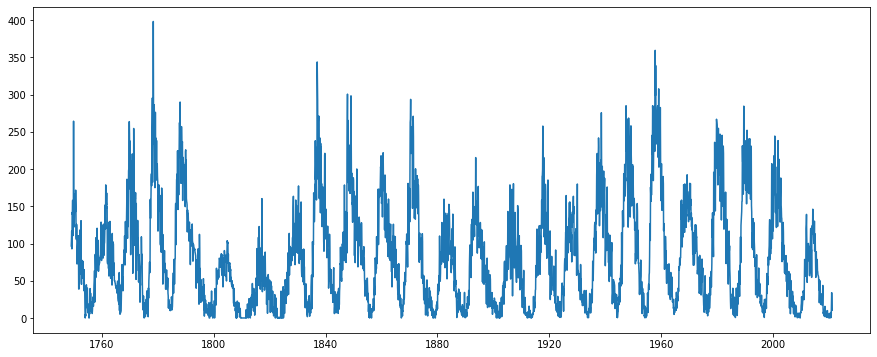

In [38]:
plt.plot(ts)

## ACF & PACF

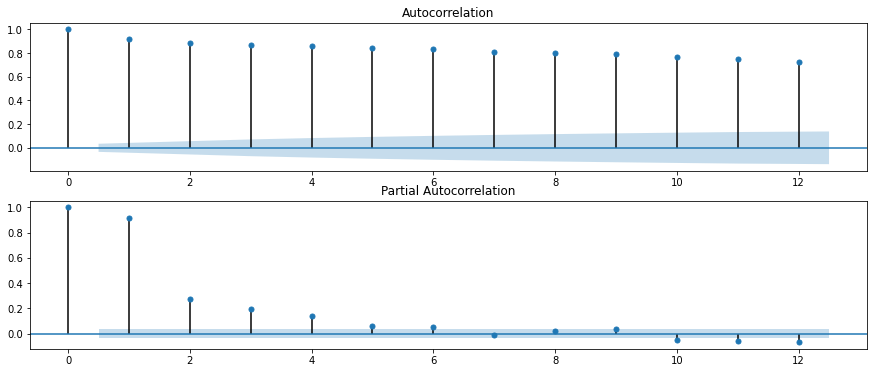

In [39]:
plt.figure()
plt.subplot(211)
plot_acf(ts, ax=plt.gca(), lags=12)
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(), lags=12)
plt.show()

## Kombinasi Model dengan Seasonal dan Trend

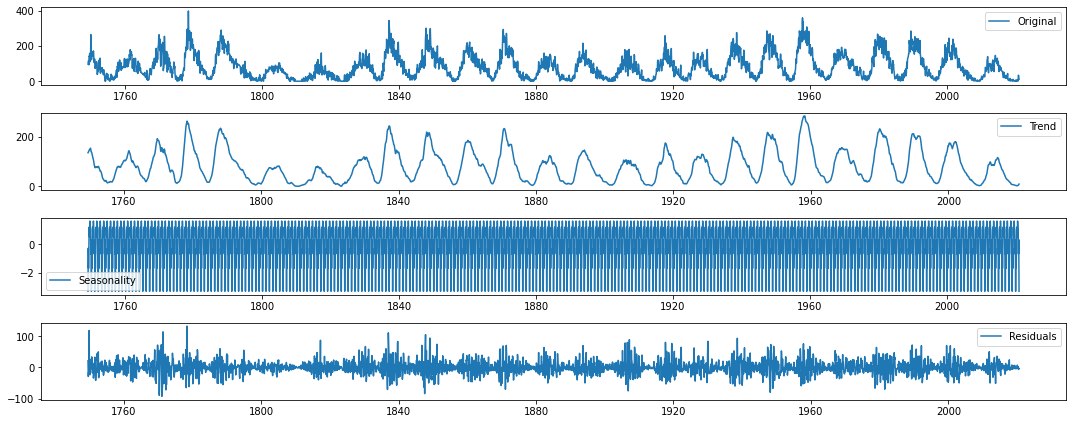

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts, model='additive',)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [46]:
%%time
train_size = int(len(ts) * 0.75)               #data trainingnya 75%
train, test = ts[:train_size], ts[train_size:]
history = [x for x in train]
# make predictions
predictions = list()
for t in range(len(test)):
		model = SARIMAX(history, order=(1,1,1), seasonal_order=(1,1,1,1))
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])

# calculate out of sample error
rmse = sqrt(mean_squared_error(test, predictions))
print(rmse)

23.661009888598464
CPU times: user 9min 47s, sys: 6min 53s, total: 16min 40s
Wall time: 8min 36s


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


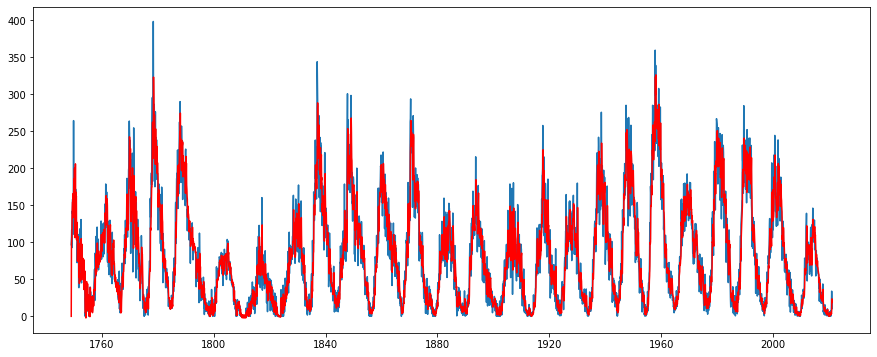

In [47]:
#Bikin model SARIMA
model_sarima = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,4))
results_SARIMA = model_sarima.fit(disp=-1)
predictions_SARIMA_diff = pd.Series(results_SARIMA.fittedvalues,copy=True)
plt.plot(ts)             
plt.plot(predictions_SARIMA_diff, color='red')               #fitting dengan data log

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


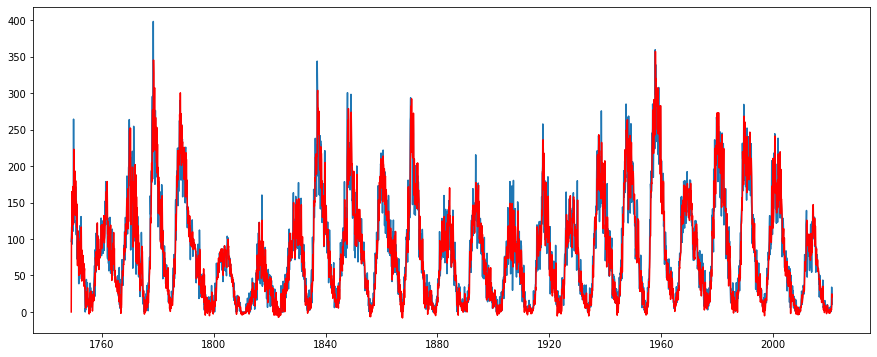

In [48]:
#SARIMA + trend untuk data asli
model_sarima_trend = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,3), trend='t')
results_SARIMA_t = model_sarima_trend.fit(disp=-1)
predictions_SARIMA_diff_t = pd.Series(results_SARIMA_t.fittedvalues,copy=True)
plt.plot(ts)             
plt.plot(predictions_SARIMA_diff_t, color='red')               #fitting dengan data

In [49]:
results_SARIMA_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   Statespace Model Results                                  
=============================================================================================
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                 3265
Model:                 SARIMAX(1, 1, 1)x(1, 1, 1, 3)   Log Likelihood              -15659.773
Date:                               Mon, 04 Apr 2022   AIC                          31331.545
Time:                                       08:02:20   BIC                          31368.084
Sample:                                   01-31-1749   HQIC                         31344.633
                                        - 01-31-2021                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift      -3.038e-06   5.53e-05     -0.055      0.956      -0.000       0.000
ar.L1          0.0239      0.068      0.354      0.724      -0.109       0.157
ma.L1         -0.4358      0.065     -6.746      0.000      -0.562      -0.309
ar.S.L3       -0.3448      0.029    -11.811      0.000      -0.402      -0.288
ma.S.L3       -0.8136      0.019    -42.883      0.000      -0.851      -0.776
sigma2      1440.6627     44.914     32.076      0.000    1352.633    1528.693
===================================================================================
Ljung-Box (Q):                      342.01   Jarque-Bera (JB):               783.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.07
Prob(H) (two-sided):                  0.27   Kurtosis:                         5.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Membuat prediksi

In [50]:
#prediksi dengan SARIMA+trend
pred_2 = results_SARIMA_t.predict(start=144,end=156)
print(pred_2)

1761-01-31    105.202334
1761-02-28    117.025742
1761-03-31    131.351145
1761-04-30    127.455514
1761-05-31    126.560149
1761-06-30    155.940156
1761-07-31    164.201898
1761-08-31    165.544296
1761-09-30    152.583887
1761-10-31    160.439039
1761-11-30    178.783943
1761-12-31    150.571750
1762-01-31    106.585482
Freq: M, dtype: float64
